# 0. Import Packages and Modules

In [1]:
from nltk.corpus import wordnet as wn
import pandas as pd
import torch

from datasets import generate_synset_df, generate_D, generate_Nu
import geometry as geom

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cashewmake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. Load formatted WordNet Data

In [2]:
synset_root = 'placental.n.01'# 'mammal.n.01'
root = wn.synset(synset_root)

print(root)
print('\nHyponyms:') 
print(root.hyponyms())
print('\nHypernyms:')
print(root.hypernyms())

Synset('placental.n.01')

Hyponyms:
[Synset('aardvark.n.01'), Synset('aquatic_mammal.n.01'), Synset('bat.n.01'), Synset('buck.n.05'), Synset('bull.n.11'), Synset('carnivore.n.01'), Synset('cow.n.02'), Synset('digitigrade_mammal.n.01'), Synset('doe.n.02'), Synset('edentate.n.01'), Synset('fissipedia.n.01'), Synset('flying_lemur.n.01'), Synset('hyrax.n.01'), Synset('insectivore.n.01'), Synset('lagomorph.n.01'), Synset('livestock.n.01'), Synset('pachyderm.n.01'), Synset('pangolin.n.01'), Synset('plantigrade_mammal.n.01'), Synset('primate.n.02'), Synset('proboscidean.n.01'), Synset('rodent.n.01'), Synset('tree_shrew.n.01'), Synset('unguiculata.n.01'), Synset('unguiculate.n.01'), Synset('ungulata.n.01'), Synset('ungulate.n.01'), Synset('yearling.n.03')]

Hypernyms:
[Synset('mammal.n.01')]


# 2. Create (u,v) Mapping for Sampling
- df: dataframe containing information on synset relations
- D: list representing positive, directed connections of the form (u, [v1,v2,...,vn])

In [3]:
df = generate_synset_df(root)

In [4]:
df.loc[synset_root]

ind                                                             760
hyponyms          [aardvark.n.01, aquatic_mammal.n.01, bat.n.01,...
level                                                             0
D                                                              True
numeric_synset    [0, 52, 91, 170, 174, 198, 257, 284, 290, 319,...
Name: placental.n.01, dtype: object

In [5]:
df[20:25]

,ind,hyponyms,level,D,numeric_synset
str_synset,,,,,
american_badger.n.01,20,None,4,False,None
american_bison.n.01,21,None,6,False,None
american_black_bear.n.01,22,[cinnamon_bear.n.01],3,True,[228]
american_flying_squirrel.n.01,23,"[northern_flying_squirrel.n.01, southern_flyin...",3,True,"[693, 931]"
american_foxhound.n.01,24,None,7,False,None


In [6]:
D = generate_D(df)

In [7]:
D

[(22, [228]),
 (23, [693, 931]),
 (41, [40, 902, 982]),
 (42,
  [5,
   125,
   137,
   285,
   321,
   386,
   392,
   403,
   458,
   463,
   505,
   554,
   658,
   689,
   712,
   804,
   858,
   860,
   870,
   958,
   1059]),
 (45, [417, 575]),
 (48, [45]),
 (52, [210, 755, 876]),
 (55, [130]),
 (58, [47, 395, 421, 736, 740, 748, 991]),
 (59, [383, 384]),
 (61, [978]),
 (63, [293, 518, 529, 1085]),
 (70, [71, 72, 73, 74, 733, 1118]),
 (78, [211, 301, 613]),
 (80, [20, 335, 357, 477]),
 (81, [132, 149, 428, 497, 840, 850]),
 (91, [199, 378]),
 (94, [144]),
 (95, [22, 60, 96, 163, 168, 503, 917]),
 (98, [682, 703]),
 (101, [2, 203, 214, 306, 382, 469, 597, 869]),
 (103, [435, 607]),
 (110, [215, 523, 570, 581, 583, 856, 923, 1002, 1006]),
 (115, [21, 1094]),
 (116, [160]),
 (145, [64, 722]),
 (147, [42, 115, 148, 368, 404, 405, 672, 704, 890, 1090]),
 (148, [152, 204, 717]),
 (152, [1117]),
 (159, [171]),
 (163, [16, 434, 975]),
 (166, [889, 1074]),
 (170, [950]),
 (173, [177]),
 (1

In [8]:
len(D)

275

### 1.4 Optimization: Loss, Gradient, and RSGD

In [20]:
import numpy as np
# torch.autograd.set_detect_anomaly(True)
n_features = 2
scale = 0.1
n_points = df.shape[0]
x_tmp = scale * (2*np.random.rand(n_points,n_features) - 1)
x = torch.tensor(x_tmp, requires_grad = True)

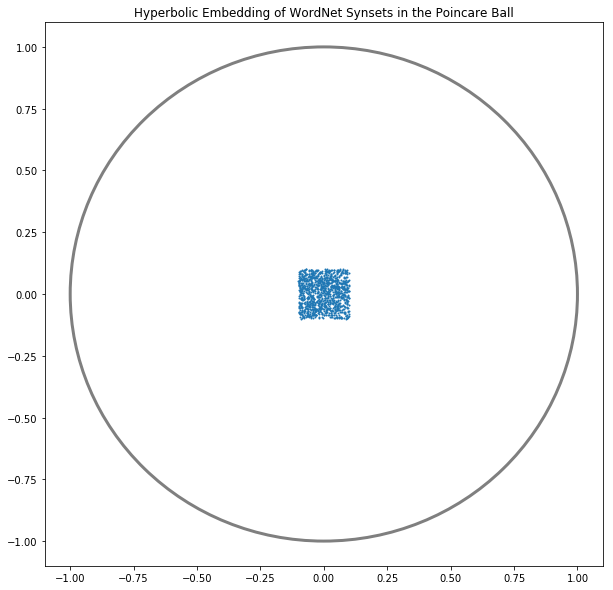

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from ipywidgets import interact
import ipywidgets as widgets

def plot_x(x):
    fig, ax = plt.subplots(figsize=(10, 10))
    circle = pt.Circle((0, 0), 1, facecolor='none', edgecolor=(0, 0, 0), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
    plt.scatter(x[:,0], x[:,1], s=1)
    plt.title("Hyperbolic Embedding of WordNet Synsets in the Poincare Ball")
    plt.show()

    
# f = lambda t: plot_x(x = xts[t])
# interact(f,t = widgets.IntSlider(min = 0, max = len(xts)-1, step = 1, continuous_update = False));

plot_x(x.detach().numpy())
plt.show()

# Visualize the Embeddings Throughout the Optimization Process

In [22]:
import torch.optim as optim
from optimization import L

In [28]:
def proj(x, epsilon = 1e-7):
    """Rescale the point to ensure that it lies within the Poincare Ball."""
    norm_x = torch.linalg.norm(x, axis = 1, keepdims = True)
    return torch.where(norm_x >= 1, x / (norm_x + epsilon), x)

In [29]:
# issue in last term of denominators: nan

In [30]:
# x0 = x.detach()

In [ ]:
lr = 1e-4
epsilon = 1e-8
n_iter = 100
n_neg_samples = 10
custom_descent = False
optim = torch.optim.Adam([x], lr=lr)

for i in range(n_iter):
    Nu = generate_Nu(D,n_neg_samples)
#     import pdb; pdb.set_trace()
    
    loss = 0
    n_features = x.shape[-1]
    for (u_ind, v_inds) in D:
        u = x[u_ind,:].reshape(1,n_features)
        vs = x[v_inds,:].reshape(len(v_inds),n_features)
        # Numerator: Positive Pairs
        numerators = torch.log(torch.exp(-geom.d(u,vs,epsilon)))

        # Denominator: Negative Pairs
        vp_inds_lists = Nu[u_ind]
        vp_x = x[vp_inds_lists,:]
        denominators = torch.stack([torch.logsumexp(-geom.d(u,vi,epsilon),dim = 0) for vi in vp_x])
#         denominators = torch.stack([torch.sum(exp_d(u,vi)) for vi in vp_x])
        # Loss for this u: set of (u,[v1,v2,...,vn])
#         print(torch.isinf(denominators).any())
        L_u = torch.sum(numerators / denominators)
        
        # switch loss to -loss
        loss -= L_u
        
    loss/=len(D)
    optim.zero_grad()
    loss.backward()
    if custom_descent:
        with torch.no_grad():
            g_pb_inv = ((1 - torch.linalg.norm(x,axis = 1)**2)**2)/4
            x.sub_(lr*g_pb_inv.unsqueeze(1)*x.grad)
            x.copy_(proj(x))
    else:
        optim.step()
# FIND NAN / INF explosions
#     with torch.no_grad():
#         norm_x = torch.linalg.norm(x, axis = 1, keepdims = True)
#         x = torch.where(norm_x >= 1, x / (norm_x + epsilon), x)
    if i % (n_iter//10) == 0:
        print(loss)

tensor(0.3614, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(0.3538, dtype=torch.float64, grad_fn=<DivBackward0>)


In [18]:
loss



tensor(39.4633, dtype=torch.float64, grad_fn=<SubBackward0>)

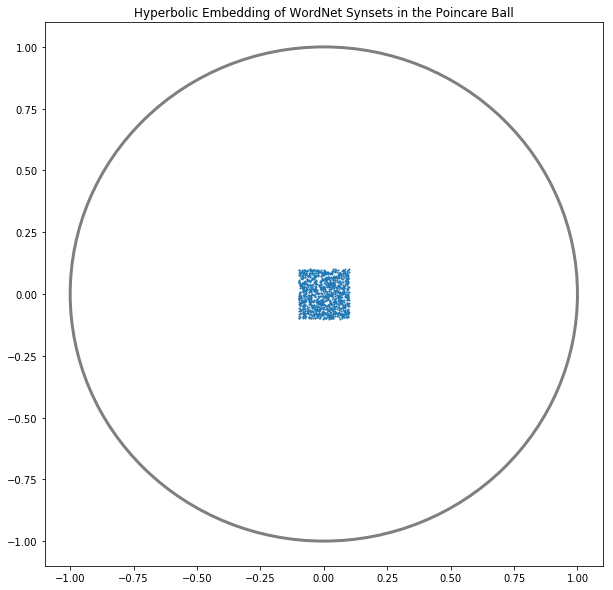

In [19]:
plot_x(x.detach().numpy(),df)

--------------
--------------

THE SCRAPS BELOW

In [51]:
x[torch.linalg.norm(x,axis=1) >= 0.386]

tensor([], size=(0, 2), dtype=torch.float64, grad_fn=<IndexBackward>)

In [170]:
for i,xi in enumerate(x):
#     print(xi)
    if torch.linalg.norm(xi) >= 0.386:
        print(i)

195


In [174]:
df

,ind,hyponyms,level,D,numeric_synset
str_synset,,,,,
aardwolf.n.01,0,None,2,False,None
affenpinscher.n.01,1,None,5,False,None
afghan_hound.n.01,2,None,4,False,None
african_hunting_dog.n.01,3,None,2,False,None
airedale.n.01,4,None,4,False,None
american_foxhound.n.01,5,None,5,False,None
american_staffordshire_terrier.n.01,6,None,5,False,None
american_water_spaniel.n.01,7,None,6,False,None
appenzeller.n.01,8,None,4,False,None


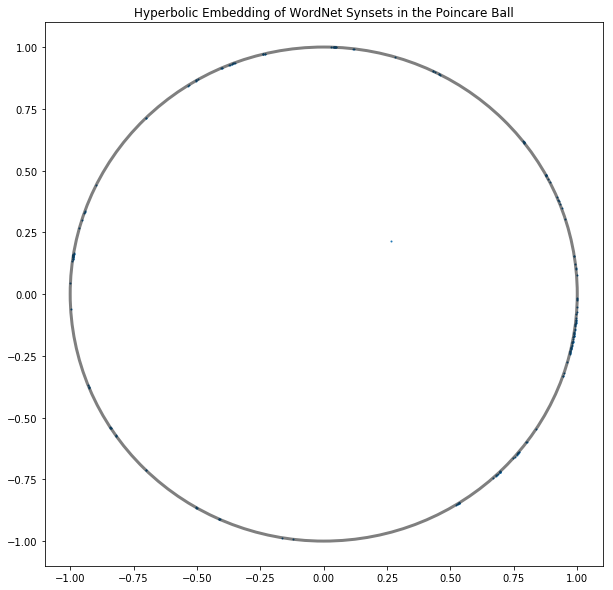

In [132]:
plot_x(x.detach().numpy())
plt.show()

In [148]:
torch.isnan(torch.sum(x.grad,axis = 1)).nonzero(as_tuple=True)[0]

tensor([], dtype=torch.int64)

In [ ]:
u_ind = 42
tons of v_inds

In [15]:
x[42]

tensor([-0.1776,  0.0813], dtype=torch.float64, grad_fn=<SelectBackward>)

In [16]:
Nu[42]

[[144, 167, 7, 188, 187, 55, 247, 146, 102, 173, 5],
 [206, 261, 237, 175, 181, 258, 54, 221, 29, 37, 127],
 [174, 284, 126, 110, 104, 274, 230, 99, 111, 239, 139],
 [117, 148, 273, 174, 253, 67, 255, 267, 47, 35, 295],
 [178, 214, 15, 8, 141, 163, 119, 230, 250, 103, 334],
 [36, 93, 212, 7, 113, 0, 168, 269, 107, 67, 403],
 [235, 29, 206, 184, 125, 50, 196, 168, 89, 102, 409],
 [144, 271, 218, 245, 31, 92, 3, 42, 210, 153, 421],
 [288, 232, 44, 91, 51, 210, 262, 187, 40, 221, 477],
 [271, 224, 192, 150, 253, 195, 12, 173, 214, 38, 482],
 [268, 62, 76, 287, 234, 279, 58, 143, 281, 256, 524],
 [11, 231, 39, 190, 105, 210, 69, 86, 94, 142, 576],
 [68, 163, 62, 90, 254, 273, 29, 152, 169, 118, 684],
 [223, 142, 37, 249, 28, 196, 211, 201, 41, 205, 719],
 [126, 185, 25, 77, 211, 102, 20, 175, 281, 238, 745],
 [82, 34, 219, 37, 217, 121, 77, 284, 96, 196, 844],
 [84, 143, 154, 209, 44, 190, 264, 265, 60, 63, 902],
 [116, 249, 79, 174, 48, 232, 268, 157, 215, 57, 904],
 [204, 284, 65, 13, 27

In [14]:
torch.isnan(torch.sum(x1,axis = 1)).nonzero(as_tuple=True)[0]

tensor([ 41,  42,  80, 102, 149, 201, 255])

In [30]:
torch.isnan(torch.sum(x1,axis = 1)).nonzero(as_tuple=True)[0]

tensor([ 42,  58,  61,  96, 102, 149, 165, 202, 213, 288])

In [38]:
x[63]

tensor([ 0.2334, -0.0877], dtype=torch.float64, grad_fn=<SelectBackward>)

In [81]:
x.grad[42]

tensor([nan, nan], dtype=torch.float64)

In [62]:
len(x)

1170

In [64]:
torch.where(torch.isnan(torch.sum(x,axis = 1)), torch.range(0,len(x)-1), 0*torch.range(0,len(x)-1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [61]:
torch.range(0,len(x)-1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 1.1670e+03, 1.1680e+03,
        1.1690e+03])

In [55]:
list(range(0,len(x)))

TypeError: list indices must be integers or slices, not list

In [15]:
x[149,:]

tensor([nan, nan], dtype=torch.float64, grad_fn=<SliceBackward>)

In [116]:

nloss

tensor(2840.4420, dtype=torch.float64, grad_fn=<NegBackward>)

In [117]:
L(x,D,Nu)

tensor(nan, dtype=torch.float64, grad_fn=<NegBackward>)

tensor([[ 2.9222, -2.7039],
        [-3.8463,  0.8738],
        [ 2.0530, -0.4011],
        ...,
        [-1.7187,  0.6356],
        [-0.5333,  1.7141],
        [ 0.7739, -1.7009]], dtype=torch.float64)

In [104]:
lr = 1e-5
g_pb_inv = ((1 - torch.linalg.norm(x,axis = 1)**2)**2)/4
x = proj(x - lr*g_pb_inv.unsqueeze(1)*x.grad)

In [105]:
x

tensor([[-0.2434,  0.1587],
        [ 0.2449, -0.0994],
        [-0.1692, -0.0550],
        ...,
        [-0.0672, -0.1114],
        [-0.1849,  0.1356],
        [ 0.1801, -0.0481]], dtype=torch.float64, grad_fn=<SWhereBackward>)

In [107]:
L(x,D,Nu)

tensor(nan, dtype=torch.float64, grad_fn=<NegBackward>)

In [103]:
g_pb_invz

tensor([nan, nan], dtype=torch.float64, grad_fn=<DivBackward0>)

In [101]:
g_pb_inv.unsqueeze(1)*x.grad

RuntimeError: The size of tensor a (2) must match the size of tensor b (1170) at non-singleton dimension 0

In [22]:
x

tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=torch.float64, requires_grad=True)

In [204]:
loss

tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)

# Explicit Computation for one pass

In [47]:
list(filter(lambda x: x[0] == 63, D))

[(63, [303, 537, 548, 1134])]

In [54]:
for i, di in enumerate(D):
    if di[0] == 63:
        print(i)

11


In [53]:
len(D)

291

In [61]:
torch.logsumexp()

<function _VariableFunctionsClass.logsumexp>

In [31]:
vi = vp_x0[0,:]

In [32]:
vi

tensor([[-0.1578,  0.1027],
        [-0.1464, -0.2494],
        [ 0.1890, -0.0446],
        [-0.1025,  0.1016],
        [-0.1676,  0.1029],
        [-0.0033, -0.1053],
        [ 0.1021,  0.0405],
        [-0.0461,  0.0366],
        [ 0.0949,  0.0787],
        [ 0.2355, -0.1915],
        [-0.0567, -0.0444]], dtype=torch.float64, grad_fn=<SliceBackward>)

In [33]:
u

tensor([[ 0.2476, -0.2076]], dtype=torch.float64, grad_fn=<ViewBackward>)

In [38]:
torch.log(torch.sum((torch.exp(-geom.d(u,vi)))))

tensor(1.7433, dtype=torch.float64, grad_fn=<LogBackward>)

In [39]:
torch.logsumexp(-geom.d(u,vi),dim = 0)

tensor(1.7433, dtype=torch.float64, grad_fn=<LogsumexpBackward>)

In [40]:
[torch.logsumexp(-geom.d(u,vi),dim = 0) for vi in vp_x0]

[tensor(1.7433, dtype=torch.float64, grad_fn=<LogsumexpBackward>),
 tensor(1.4389, dtype=torch.float64, grad_fn=<LogsumexpBackward>),
 tensor(1.7409, dtype=torch.float64, grad_fn=<LogsumexpBackward>),
 tensor(1.7697, dtype=torch.float64, grad_fn=<LogsumexpBackward>)]

In [84]:
torch.log(torch.exp(-geom.d(u,vs)))

tensor([-0.9622, -0.7078, -0.6250, -0.5761], dtype=torch.float64,
       grad_fn=<LogBackward>)

In [85]:
denominators = torch.stack([torch.logsumexp(-geom.d(u,vi),dim = 0) for vi in vp_x0])

In [30]:
Nu = generate_Nu(D)

u_ind, v_inds = D[11]
print(u_ind)
print(v_inds)

u = x[u_ind,:].reshape(1,n_features)
print(u)

vs = x[v_inds,:].reshape(len(v_inds),n_features)
print(vs)

numerators = torch.log(torch.exp(-geom.d(u,vs)))
print(numerators)

vp_inds_lists = Nu[u_ind]
print(vp_inds_lists)

vp_x0 = x[vp_inds_lists,:]
denominators = torch.stack([torch.logsumexp(-geom.d(u,vi),dim = 0) for vi in vp_x0])

L_u = torch.sum(numerators / denominators)
print(L_u)

63
[303, 537, 548, 1134]
tensor([[ 0.2476, -0.2076]], dtype=torch.float64, grad_fn=<ViewBackward>)
tensor([[-0.0567, -0.0444],
        [-0.1383,  0.0591],
        [ 0.1400,  0.1640],
        [ 0.2469, -0.2390]], dtype=torch.float64, grad_fn=<ViewBackward>)
tensor([-0.7163, -0.9650, -0.8146, -0.0706], dtype=torch.float64,
       grad_fn=<LogBackward>)
[[204, 249, 158, 218, 270, 165, 171, 200, 9, 272, 303], [168, 53, 108, 43, 278, 255, 209, 150, 200, 32, 537], [201, 151, 105, 52, 289, 33, 9, 160, 128, 142, 548], [244, 126, 209, 112, 39, 181, 96, 56, 36, 236, 1134]]
tensor(-1.5894, dtype=torch.float64, grad_fn=<SumBackward0>)


In [60]:
x[63,:].grad

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


# 2. Initialize Problem

In [ ]:
scale = 0.1
n_points = df.shape[0]
x0 = scale * (1 - 2*np.random.rand(2 , n_points))

# 3. Optimize to Find Poincare Embeddings

In [10]:
# Not yet completed
xts, losses = rgd(proj(x0), D = D, num_iter = 40)

Iteration: 0
Loss: -2734.584049905395
Iteration: 1
Loss: -2765.017948908191
Iteration: 2
Loss: -2798.8743013317285
Iteration: 3
Loss: -2831.469152872787
Iteration: 4
Loss: -2856.296915122606
Iteration: 5
Loss: -2888.589235518963
Iteration: 6
Loss: -2900.056289347544
Iteration: 7
Loss: -2923.5932760017527
Iteration: 8
Loss: -2938.6732221534267
Iteration: 9
Loss: -2950.414012832103
Iteration: 10
Loss: -2972.8041741838583
Iteration: 11
Loss: -2971.9892353179744
Iteration: 12
Loss: -2968.5868034440177
Iteration: 13
Loss: -2978.4606082707382
Iteration: 14
Loss: -2982.9468896192284
Iteration: 15
Loss: -3016.723763445375
Iteration: 16
Loss: -3021.3165714491083
Iteration: 17
Loss: -3037.615970943317
Iteration: 18
Loss: -3047.955702400457
Iteration: 19
Loss: -3045.206178342194
Iteration: 20
Loss: -3102.222596310217
Iteration: 21
Loss: -3088.2011995862863
Iteration: 22
Loss: -3111.2324497539685
Iteration: 23
Loss: -3106.9778820620986
Iteration: 24
Loss: -3127.945082618455
Iteration: 25
Loss: -31

In [11]:
xf = xts[-1]

# 4. Visualization 

### 4.1 Visualize the Embeddings Throughout the Optimization Process

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from ipywidgets import interact
import ipywidgets as widgets

In [13]:
def plot_x(x):
    fig, ax = plt.subplots(figsize=(10, 10))
    circle = pt.Circle((0, 0), 1, facecolor='none', edgecolor=(0, 0, 0), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
    plt.scatter(x[0,:], x[1,:], s=1)
    plt.title("Hyperbolic Embedding of WordNet Synsets in the Poincare Ball")
    plt.show()

    
f = lambda t: plot_x(x = xts[t])
interact(f,t = widgets.IntSlider(min = 0, max = len(xts)-1, step = 1, continuous_update = False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=40), Output()), _dom_cl…

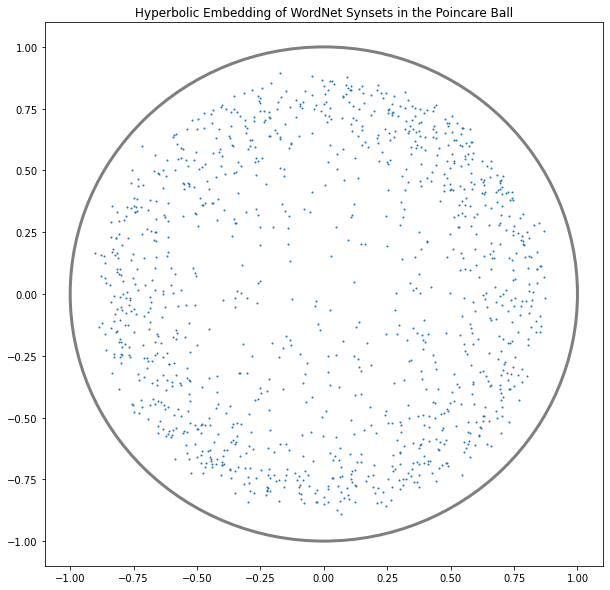

In [37]:
plot_x(xts[-1])

### 4.2 Visualize Subtrees from WordNet with Networkx
TODO

In [14]:
import networkx as nx
from matplotlib import cm

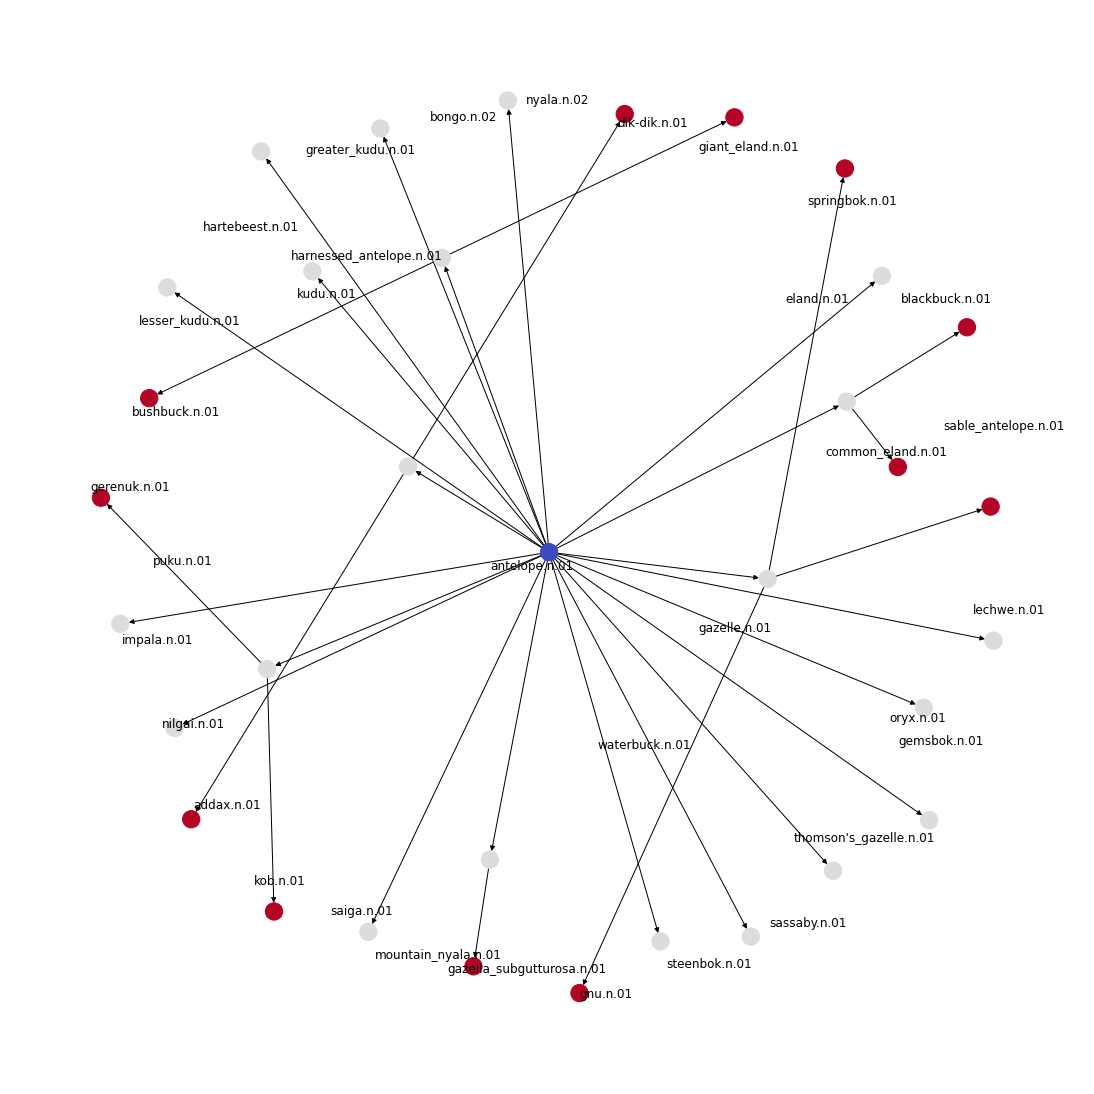

In [36]:
# def display_subtrees_nx(synset_root):
#     """Display the synset subtrees beginning from a synset root."""
synset_root = wn.synset('antelope.n.01')
df = generate_synset_df(synset_root)
max_level = df.level.max()
D = generate_D(df)
dg = nx.DiGraph()
for (u_ind, v_inds) in D:
    dg.add_edges_from([(u_ind, v_ind) for v_ind in v_inds])

labels = {}    
color_map = []
for node in dg.nodes():
    labels[node] = df.iloc[node].name
    color_map.append(cm.coolwarm(float(df.level[node])/max_level))

fig = plt.figure(figsize = (15,15))
nx.draw(dg, with_labels=False, node_color=color_map)
labeled_nodes = nx.draw_networkx_labels(dg, pos = nx.spring_layout(dg), labels = labels)

# 5. Explore Embedding Performance

TODO

# 6. Additional Sanity Checks

### Test the partial derivative of the distance function with respect to u or v

In [17]:
u = 1*(2-np.random.rand(2,1))
v = 1*(2-np.random.rand(2,1))

delta = 1E-8
# wrt u
print('u')
print(np.dot(np.ones((2,1)).T, dp(u, v)))
print((d(u+delta, v) - d(u, v))/delta)

# wrt v
print('v')
print(np.dot(np.ones((2,1)).T,dp(v,u)))
print((d(u, v+delta) - d(u, v))/delta)

u
[[-0.85851175]]
[-0.85851175]
v
[[-0.02266943]]
[-0.02266943]


### Test the Euclidean gradient of the loss function

TODO: Fix/Finish implementing the gradient

Currently the gradient is just a low-magnitude random vector, so these numbers won't be close

In [18]:
mammal = wn.synset('mammal.n.01')
df = generate_synset_df(mammal)
scale = 0.5
n_points = df.shape[0]
x0 = scale * (1 - 2*np.random.rand(2 , n_points).astype(np.float64))
D = generate_D(df)
Nu = generate_Nu(D, Nu_n_samples=10)

dx0 = 1E-6
print('True Loss Slope: ' + str((L(x0 + dx0*np.ones_like(x0), D, Nu) - L(x0, D, Nu))/dx0))
print('grad_E Slope: ' + str(np.dot(np.ones((2,n_points)).flatten().T, grad_E(x0, D, Nu).flatten())))
# I need to fix the gradient step: I'm getting divide by zero / np.inf values out!
# For now I've replaced the gradient with random values to test this issue
# These will not equal each other!

True Loss Slope: 2.0126499293837696
grad_E Slope: -6.281831352044364


TODO: Fix the gradient method so that I don't have any more np.infs!

In [19]:
ge = grad_E(x0, D, Nu)
ge[ge == np.inf]

array([], dtype=float64)